Import numpy and pandas.

In [163]:
import pandas as pd
import numpy as np
from subprocess import check_output
import matplotlib
import matplotlib.pyplot as plt

Using the bash magic command, view the list of files inside of the data directory.

In [164]:
%ls -lrt data

total 17864
-rw-r--r--  1 amishra  staff  8577108 Mar 23 16:20 ActiveFile-Wilm1thru8-20191015.csv
-rw-r--r--  1 amishra  staff   543729 Mar 23 16:20 DE-VoterFile-Documentation 20171010.pdf
-rw-r--r--  1 amishra  staff    16454 Mar 23 17:32 wilmington_de_registered_voters.ipynb


Load the csv file into a Pandas DataFrame.

In [165]:
df = pd.read_csv('./data/ActiveFile-Wilm1thru8-20191015.csv')

Display a list of columns in the DataFrame.

In [166]:
for col in df.columns: 
    print(col)

UNIQUE-ID
LAST-NAME
FIRST-NAME
MID-INIT
SUFFIX
YEAR-OF-BIRTH
HOME-NO
HOME-APT
HOME-STREET
HOME-DEV
HOME-CITY
HOME-ZIPCODE
COUNTY
ED
RD
SD
CNLEVY
WILM
CODE-HOME-CITY
SCH-DIST
PARTY
DATE-REG
PP-HIST-1
PP-HIST-2
PR-HIST-1
PR-HIST-2
PR-HIST-3
GEN-HIST-1
GEN-HIST-2
GEN-HIST-3
GEN-HIST-4
GEN-HIST-5
SP-HIST-1
SP-HIST-2
SP-HIST-3
SCHL-HIST-1
SCHL-HIST-2
SCHL-HIST-3
SCHL-HIST-4
SCHL-HIST-5
REF-HIST-1
REF-HIST-2
REF-HIST-3
REF-HIST-4
REF-HIST-5
MAIL-NO
MAIL-APT
MAIL-STR
MAIL-CITY
MAIL-STATE
MAIL-ZIP
DATE-LAST-CHG
CODE-CHANGE
STATUS


What is the shape of this DataFrame? How many columns does each row have? How many rows are there?

In [167]:
df.shape

(51909, 54)

In [168]:
df.dtypes

UNIQUE-ID           int64
LAST-NAME          object
FIRST-NAME         object
MID-INIT           object
SUFFIX             object
YEAR-OF-BIRTH       int64
HOME-NO            object
HOME-APT           object
HOME-STREET        object
HOME-DEV           object
HOME-CITY          object
HOME-ZIPCODE        int64
COUNTY             object
ED                  int64
RD                  int64
SD                  int64
CNLEVY              int64
WILM                int64
CODE-HOME-CITY     object
SCH-DIST           object
PARTY              object
DATE-REG            int64
PP-HIST-1           int64
PP-HIST-2           int64
PR-HIST-1           int64
PR-HIST-2           int64
PR-HIST-3           int64
GEN-HIST-1          int64
GEN-HIST-2          int64
GEN-HIST-3          int64
GEN-HIST-4          int64
GEN-HIST-5          int64
SP-HIST-1          object
SP-HIST-2         float64
SP-HIST-3         float64
SCHL-HIST-1        object
SCHL-HIST-2        object
SCHL-HIST-3        object
SCHL-HIST-4 

In [169]:
s = df.select_dtypes(include='object')
s

,LAST-NAME,FIRST-NAME,MID-INIT,SUFFIX,HOME-NO,HOME-APT,HOME-STREET,HOME-DEV,HOME-CITY,COUNTY,...,REF-HIST-1,REF-HIST-2,REF-HIST-3,MAIL-NO,MAIL-APT,MAIL-STR,MAIL-CITY,MAIL-STATE,CODE-CHANGE,STATUS
0,ROY,BEVERLY,A,NaN,320,#912,E 5TH ST,HERLIHY HOUSE APTS,WILMINGTON,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CR,A
1,WILLIAMS,LISA,F,NaN,826,NaN,W 5TH ST,NaN,WILMINGTON,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CR,A
2,HARRIS,JOSEPH,A,III,2616,NaN,W 18TH ST,NaN,WILMINGTON,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CR,A
3,LAMBORN,GERALD,V,NaN,706,NaN,W 34TH ST,NaN,WILMINGTON,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CR,A
4,KRYSTOPOLSKI,ANDREW,R,NaN,1009,NaN,ANCHORAGE ST,NaN,WILMINGTON,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CR,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51904,BROOMER,CHERLOTTE,D,NaN,1340,NaN,LANCASTER AVE,NaN,WILMINGTON,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CR,A
51905,HANEY,JANICE,M,NaN,21,NaN,IVY RD,NaN,WILMINGTON,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,A
51906,MARTIN,ELMARIA,D,NaN,2910,NaN,N WEST ST,NaN,WILMINGTON,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,A
51907,ROSE,KENISHA,A,NaN,1300,#A401,N HARRISON ST,MAYFAIR APTS,WILMINGTON,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CR,A


# HOME ZIP CODE

Group objects using the HOME-ZIPCODE column. Assign the value to a variable called grouped_zc.  
[Pandas Groupby User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [170]:
grouped_zc = df.groupby('HOME-ZIPCODE')
grouped_zc

What type of object is grouped_zc?

In [171]:
print(type(grouped_zc))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


DataFrameGroupBy objects contain a groups attribute. Display the value of the groups attribute belonging to the grouped_zc object.

In [172]:
# 
grouped_zc.groups

{19801: Int64Index([    0,     1,    10,    12,    13,    15,    16,    20,    24,
                34,
             ...
             51865, 51874, 51877, 51881, 51885, 51890, 51891, 51892, 51897,
             51900],
            dtype='int64', length=10730),
 19802: Int64Index([    3,     5,    11,    21,    29,    30,    31,    38,    39,
                40,
             ...
             51866, 51867, 51872, 51882, 51883, 51887, 51893, 51901, 51902,
             51906],
            dtype='int64', length=17182),
 19805: Int64Index([    4,     6,     7,     8,    14,    17,    18,    19,    22,
                23,
             ...
             51862, 51864, 51869, 51873, 51880, 51886, 51888, 51889, 51898,
             51904],
            dtype='int64', length=15548),
 19806: Int64Index([    2,     9,    28,    48,    83,    96,   106,   114,   150,
               169,
             ...
             51879, 51884, 51894, 51895, 51896, 51899, 51903, 51905, 51907,
             51908],
      

Invoke the size method on the grouped_zc object to find out how many items are associated with each zip code.

In [173]:
grouped_zc.size()

HOME-ZIPCODE
19801    10730
19802    17182
19805    15548
19806     8326
19807      123
dtype: int64

Use a magic command so that matplotlib graphics will display inline.

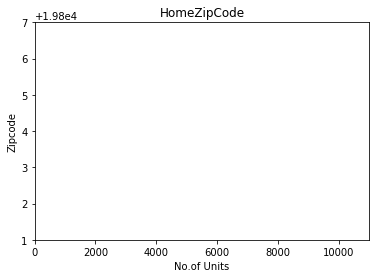

In [174]:
%matplotlib inline
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 11000), ylim=(19801, 19807),
       xlabel='No.of Units', ylabel='Zipcode',
       title='HomeZipCode');

Create a pie chart illustrating the number of voters per zip code.

In [175]:
No_Of_voters = grouped_zc.count()
No_Of_voters

,UNIQUE-ID,LAST-NAME,FIRST-NAME,MID-INIT,SUFFIX,YEAR-OF-BIRTH,HOME-NO,HOME-APT,HOME-STREET,HOME-DEV,...,REF-HIST-5,MAIL-NO,MAIL-APT,MAIL-STR,MAIL-CITY,MAIL-STATE,MAIL-ZIP,DATE-LAST-CHG,CODE-CHANGE,STATUS
HOME-ZIPCODE,,,,,,,,,,,,,,,,,,,,,
19801,10730,10730,10730,9324,605,10730,10730,4477,10730,2648,...,0,88,3,72,138,138,139,10730,10730,10730
19802,17182,17182,17182,15240,1037,17182,17182,2567,17182,1982,...,0,83,6,74,123,123,123,17182,17182,17182
19805,15548,15548,15548,13059,858,15548,15548,1983,15548,2080,...,0,79,5,80,136,136,136,15548,15548,15548
19806,8326,8326,8326,7571,431,8326,8326,3533,8326,1990,...,0,53,4,40,82,82,82,8326,8326,8326
19807,123,123,123,115,5,123,123,0,123,94,...,0,0,0,0,0,0,0,123,123,123


([<matplotlib.patches.Wedge at 0x1263121d0>,
 [Text(0.8760967626973386, 0.6651725057391077, '19801'),
  Text(-0.764058752148303, 0.7913369846440758, '19802'),
  Text(-0.42112865275664896, -1.0161942028113375, '19805'),
  Text(0.9552631610472119, -0.5454102063090577, '19806'),
  Text(1.099969521734947, -0.008188483021424421, '19807')])

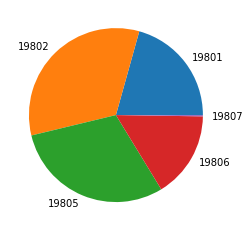

In [176]:
labels = "19801", "19802", "19805", "19806", "19807"
matplotlib.pyplot.pie(grouped_zc.size(), labels = labels)

# YEAR OF BIRTH

Group objects by the YEAR-OF-BIRTH column. Assign the value to an object called "grouped_yob".

In [177]:
grouped_yob = df.groupby('YEAR-OF-BIRTH')
grouped_yob

Display the value of the groups attribute belonging the grouped_yob object.

In [178]:
grouped_yob.size()

YEAR-OF-BIRTH
1900      1
1912      1
1915      2
1916      3
1917      2
       ... 
1998    786
1999    719
2000    717
2001    575
2002    395
Length: 90, dtype: int64

Select the object for the row indicating that the voter was born in 1900.

In [179]:
df.loc[lambda df: df["YEAR-OF-BIRTH"] < 1901, :]

,UNIQUE-ID,LAST-NAME,FIRST-NAME,MID-INIT,SUFFIX,YEAR-OF-BIRTH,HOME-NO,HOME-APT,HOME-STREET,HOME-DEV,...,REF-HIST-5,MAIL-NO,MAIL-APT,MAIL-STR,MAIL-CITY,MAIL-STATE,MAIL-ZIP,DATE-LAST-CHG,CODE-CHANGE,STATUS
49249,101092654,KENNEDY,JORDAN,D,NaN,1900,724,NaN,N BANCROFT PKY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170731,P6,I


Graph a histogram to  illustrate the age distribution of voters in this dataset. Ty using different values for the bins attribute of the histogram. 

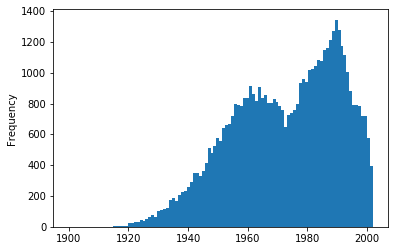

In [180]:
df["YEAR-OF-BIRTH"].plot.hist(bins=103)

# PARTY

Group objects using the PARTY column. Assign the value to a variable called grouped_p.

In [181]:
grouped_p = df.groupby('PARTY').groups


Display the value of the groups attribute belonging to the grouped_p object.

In [182]:
grouped_p

{'A': Int64Index([ 2578,  2639,  3108,  5105, 10230, 10491, 10842, 11620, 12162,
             12413, 12417, 12454, 12507, 12522, 12810, 12831, 14469, 14507,
             15144, 15382, 15509, 16858, 17075, 17173, 17309, 19466, 19884,
             20846, 21086, 21459, 22451, 22645, 22746, 23739, 24604, 24664,
             24665, 24691, 26662, 28775, 30455, 30510, 30976, 34065, 34903,
             36518, 44984, 45851, 46837, 49699, 51736, 51830],
            dtype='int64'),
 'B': Int64Index([11866, 11867, 11869, 11870, 11873, 11875, 11876, 11880, 11882,
             11883,
             ...
             50153, 50167, 50172, 50176, 50211, 50246, 50339, 50340, 50343,
             50469],
            dtype='int64', length=441),
 'D': Int64Index([    1,     3,     4,     5,     6,    10,    11,    12,    16,
                17,
             ...
             51896, 51897, 51898, 51899, 51901, 51902, 51904, 51905, 51906,
             51907],
            dtype='int64', length=38020),
 'E': Int64I

Invoke the size method on the grouped_p object to find out how many items are associated with each party.

In [183]:
grouped_p1=grouped_p.size()
grouped_p1

AttributeError: 'dict' object has no attribute 'size'

Create a bar chart to visualize the number of voters associated with each party.

In [189]:
grouped_p1.plot.bar()

NameError: name 'grouped_p1' is not defined

# Merging Two DataFrames

Using the data from the documentation, create a Pandas DataFrame that contains the party code and the corresponding legal name for each party.

In [ ]:
legal_names = {}

FileNotFoundError: [Errno 2] File b'PartyAffiliation.csv' does not exist: b'PartyAffiliation.csv'

In [186]:
df['PARTY'].()

AttributeError: 'Series' object has no attribute 'legal_names'

In [ ]:
df_legal_names = pd.DataFrame(legal_names)

In [ ]:
df_legal_names

Create a Pandas DataFrame that contains the Party code and the corresponding number of registered voters for said party.

In [ ]:
# Create DataFrame df_party_counts here 

In [ ]:
# df_party_counts 

Merge the two DataFrames.

In [ ]:
# Merge DataFrame here 

In [ ]:
# Display new DataFrame here 

Create a bar graph again but using the legal name for each party as the value on the x axes.

In [ ]:
# 